In [ ]:
pip install pydash wordcloud textacy contractions

In [ ]:
from pydash import py_
import json  
from textacy import preprocessing

In [5]:
with open("../../data/reddit_comments.json") as file:
    reddit = json.load(file)

In [89]:
reddit[0]

{'_replies': [],
 'id': 'e8q18lf',
 'total_awards_received': 0,
 'approved_at_utc': None,
 'comment_type': None,
 'edited': False,
 'mod_reason_by': None,
 'banned_by': None,
 'author_flair_type': 'text',
 'removal_reason': None,
 'link_id': 't3_9smha5',
 'author_flair_template_id': None,
 'likes': None,
 'user_reports': [],
 'saved': False,
 'banned_at_utc': None,
 'mod_reason_title': None,
 'gilded': 0,
 'archived': True,
 'no_follow': False,
 'author': 'PessimisticPaladin',
 'can_mod_post': False,
 'created_utc': 1540905081.0,
 'send_replies': True,
 'parent_id': 't3_9smha5',
 'score': 4,
 'author_fullname': 't2_12qeux',
 'approved_by': None,
 'mod_note': None,
 'all_awardings': [],
 'subreddit_id': 't5_33726',
 'body': 'A subsection of retarded Hungarians? Ohh boy. brace for a livid Bulbasaur coming in here trying to hate a hole in some of her stupider countrymen.',
 'awarders': [],
 'author_flair_css_class': None,
 'name': 't1_e8q18lf',
 'author_patreon_flair': False,
 'downs': 0,

In [75]:
hate = py_.filter(reddit, {"is_hate": 0})

In [76]:
hate_comments = py_.map(hate, 'body')

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


def make_wordcloud(new_text):
    
    wordcloud = WordCloud(width = 800, height = 800, 
                min_font_size = 10,
                background_color='black', 
                colormap='Set2', 
                collocations=False).generate(new_text) 
    
    
    fig = plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0)     
    return fig

In [78]:
comment = hate_comments[1] 
comment 

'wow i guess soyboys are the same in every country'

In [79]:
from textacy import preprocessing
import contractions

In [80]:
remove_contractions = lambda text: contractions.fix(text)

In [81]:
remove_contractions("I won't")

'I will not'

In [82]:
preproc = preprocessing.make_pipeline(
    preprocessing.replace.emojis,
    preprocessing.replace.urls,
    remove_contractions,
    preprocessing.remove.punctuation,
    preprocessing.normalize.whitespace,
)

In [83]:
def process(preproc, comment: str):
    return preproc(comment)

In [88]:
processed_comments = [process(preproc, comment) for comment in hate_comments]
processed_comments[0]

'Hiii Just got off work 444 is mainly the typa guys you imagine writing for US stupid sites but basically they just try to fit in with the Western European and US big city hipsters Rich kids from Budapest who feel they are brave journalistic heroes'

In [86]:
concat_comments = ' '.join(processed_comments)

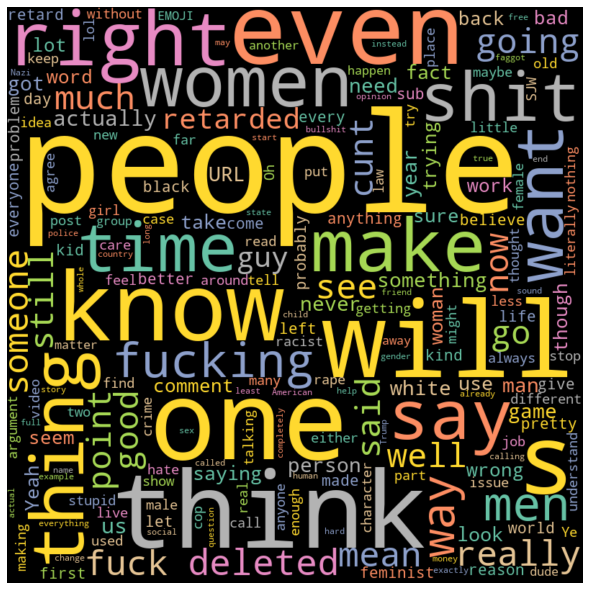

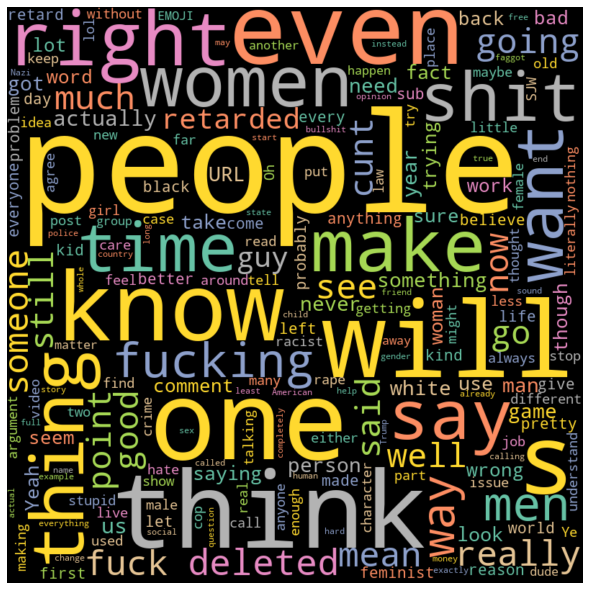

In [87]:
make_wordcloud(concat_comments)